In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [10]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
dta.shape

(6366, 10)

In [12]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [9]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
print("Statistics Summary of data 1")
dta.describe()

Statistics Summary of data


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [15]:
print("Statistics Summary of data 2")
X.describe().T

Statistics Summary of data 2


,count,mean,std,min,25%,50%,75%,max
Intercept,6366.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
occ_2,6366.0,0.134936,0.341682,0.0,0.0,0.0,0.0,1.0
occ_3,6366.0,0.437166,0.496075,0.0,0.0,0.0,1.0,1.0
occ_4,6366.0,0.288093,0.452910,0.0,0.0,0.0,1.0,1.0
occ_5,6366.0,0.116243,0.320541,0.0,0.0,0.0,0.0,1.0
occ_6,6366.0,0.017122,0.129737,0.0,0.0,0.0,0.0,1.0
occ_husb_2,6366.0,0.205467,0.404074,0.0,0.0,0.0,0.0,1.0
occ_husb_3,6366.0,0.076971,0.266567,0.0,0.0,0.0,0.0,1.0
occ_husb_4,6366.0,0.318882,0.466080,0.0,0.0,0.0,1.0,1.0
occ_husb_5,6366.0,0.279453,0.448766,0.0,0.0,0.0,1.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2582216d0>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

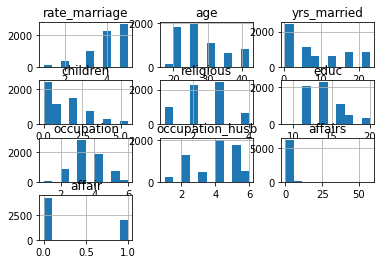

In [23]:
%matplotlib inline
plt.figure(figsize=(20,20))
dta.hist()
    

In [24]:
print("Train Test Split")
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print("Size of train data: ",X_train.shape)
print("Size of train label: ",y_train.shape)
print("Size of test data: ",X_test.shape)
print("Size of test label: ",y_test.shape)

Train Test Split
Size of train data:  (5092, 17)
Size of train label:  (5092,)
Size of test data:  (1274, 17)
Size of test label:  (1274,)


In [25]:
logit = sm.Logit(y_train,X_train)
fit_res = logit.fit()

Optimization terminated successfully.
         Current function value: 0.546532
         Iterations 6


In [26]:
fit_res.predict(X_test)

2764    0.654847
4481    0.089395
5360    0.264188
5802    0.251308
1220    0.242554
          ...   
4287    0.093273
5257    0.197567
4388    0.666247
2580    0.305448
534     0.653035
Length: 1274, dtype: float64

In [28]:
from scipy import stats

stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq,df)

In [29]:
fit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5075
Method:                           MLE   Df Model:                           16
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.1351
Time:                        10:42:32   Log-Likelihood:                -2782.9
converged:                       True   LL-Null:                       -3217.5
Covariance Type:            nonrobust   LLR p-value:                1.072e-174
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6134      0.697      3.749      0.000       1.247       3.980
occ_2             0.7815      0.577      1.356      0.175      -0.348       1.911
occ_3             1.0365      0.571      1.815      0.070      -0.083       2.156
occ_4             0.7969      0.572      1.393      0.164      -0.325       1.918
occ_5             1.4473      0.576      2.512      0.012       0.318       2.576
occ_6             1.4643      0.623      2.350      0.019       0.243       2.685
occ_husb_2        0.0365      0.204      0.179      0.858      -0.363       0.436
occ_husb_3        0.1255      0.223      0.564      0.573      -0.311       0.562
occ_husb_4        0.0093      0.198      0.047      0.963      -0.379       0.397
occ_husb_5        0.0268      0.200      0.134      0.893      -0.364       0.418
occ_husb_6       -0.0111      0.224     -0.050      0.960      -0.449       0.427
rate_marriage    -0.7008      0.035    -20.018      0.000      -0.769      -0.632
age              -0.0576      0.012     -4.984      0.000      -0.080      -0.035
yrs_married       0.1085      0.012      8.807      0.000       0.084       0.133
children          0.0027      0.036      0.075      0.940      -0.067       0.073
religious        -0.3799      0.039     -9.776      0.000      -0.456      -0.304
educ              0.0013      0.019      0.068      0.945      -0.037       0.039
=================================================================================
"""

In [30]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [31]:
dta.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [32]:
print("From the above finding women having affairs rate their marriage less as compared to women without affairs")

From the above finding women having affairs rate their marriage less as compared to women without affairs


In [33]:
dta.groupby("rate_marriage").mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


From above we can conclude following things: 
women with higher ages tends to give very low ratings their marriages
We can observe that age, yrs_married, and children have some strong connections 


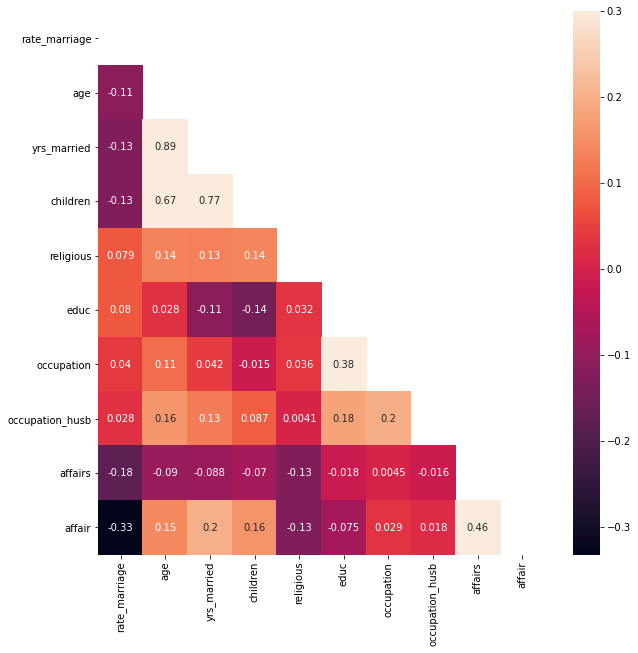

In [41]:
print("From above we can conclude following things: ")
print("women with higher ages tends to give very low ratings their marriages")
print("We can observe that age, yrs_married, and children have some strong connections ")

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dta.corr(),annot=True,mask=np.triu(dta.corr()), vmax=.3)

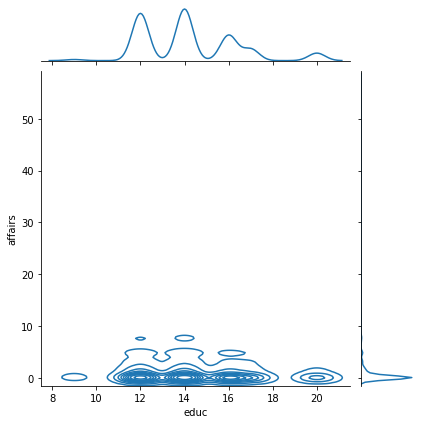

In [44]:
sns.jointplot(x='educ',y='affairs',data=dta,kind='kde')

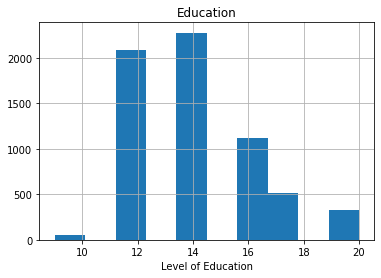

In [45]:
plt.title("Education")
plt.xlabel("Level of Education")
dta.educ.hist()

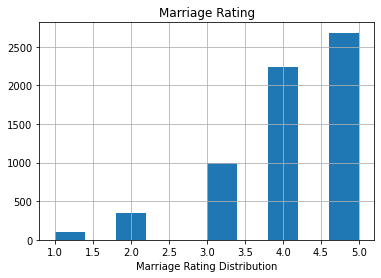

In [46]:
plt.title("Marriage Rating")
plt.xlabel("Marriage Rating Distribution")
dta.rate_marriage.hist()

Text(0.5, 0, 'Marriage Rating Distribution')

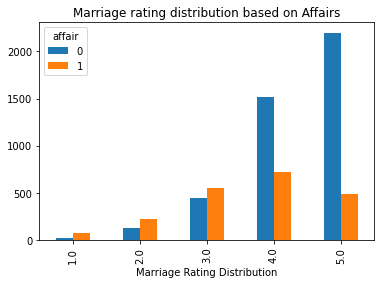

In [49]:
pd.crosstab(dta.rate_marriage,dta.affair).plot(kind='bar')
plt.title("Marriage rating distribution based on Affairs")
plt.xlabel("Marriage Rating Distribution")



Text(0.5, 0, 'Years of marriage Distribution')

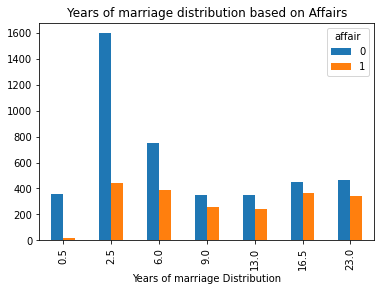

In [50]:
pd.crosstab(dta.yrs_married,dta.affair).plot(kind='bar')
plt.title("Years of marriage distribution based on Affairs")
plt.xlabel("Years of marriage Distribution")

Text(0.5, 0, 'Age Distribution')

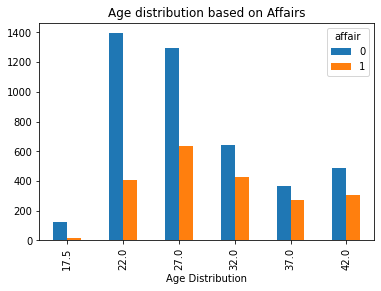

In [51]:
pd.crosstab(dta.age,dta.affair).plot(kind='bar')
plt.title("Age distribution based on Affairs")
plt.xlabel("Age Distribution")

In [55]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print("Training Accuracy:")
print(model.score(X_train,y_train))

Training Accuracy:
0.7227022780832679


In [61]:
y_pred = model.predict(X_test)
y_pred_probability= model.predict_proba(X_test)


In [63]:
print("Model Evaluation")
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred_probability[:,1]))

Model Evaluation
0.7425431711145997
0.7494836826282081


In [65]:
pip install scikit-plot

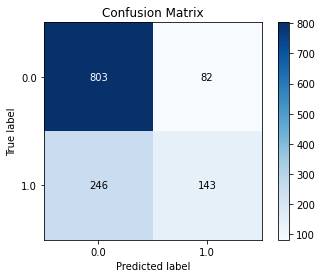

In [66]:
from scikitplot import metrics

metrics.plot_confusion_matrix(y_test,y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


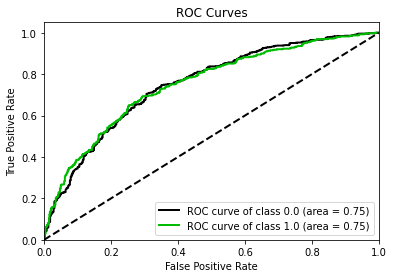

In [67]:
metrics.plot_roc_curve(y_test,y_pred_probability,curves=['each_class'])

In [70]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       885
         1.0       0.64      0.37      0.47       389

    accuracy                           0.74      1274
   macro avg       0.70      0.64      0.65      1274
weighted avg       0.73      0.74      0.72      1274



In [71]:
score = cross_val_score(model,X,y,scoring='accuracy',cv=10)
score,score.mean()

(array([0.72056515, 0.70172684, 0.73783359, 0.70643642, 0.70486656,
        0.73155416, 0.73427673, 0.70440252, 0.75471698, 0.74685535]),
 0.7243234303881204)

In [82]:
print("Lets predict the probability of a random women")
import random
test_women = np.array(X.loc[random.randint(0,X.shape[0]),].values)
test_women

Lets predict the probability of a random women


array([ 1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
        2. , 37. , 16.5,  2. ,  2. , 12. ])

In [85]:
model.predict(test_women.reshape(1,-1))

array([1.])

In [86]:
model.predict_proba(test_women.reshape(1,-1))

array([[0.17045124, 0.82954876]])

In [87]:
print("From above we conclude that with 83% probability women would affair")

From above we conclude that with 83% probability women would affair
